# Softmax Regression
> In this post, it will cover the basic concept of softmax regression, also known as multinomial classification. And it will explain what the hypothesis and cost function, and how to solve it with gradient descent as we saw previously. Also we will try to implement it with tensorflow 2.x

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Tensorflow, Machine_Learning]
- image: images/sigmoid.png

In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['text.usetex'] = True
plt.rc('font', size=15)

## Logistic Regression
Previously, we covered logistic regression, which can handle the classification task, especially on binary classification. Basic concept of logistic regression is the same as the one in linear regression. For the simplicity, we omit the bias term.

$$ H_{\theta}(X) = \theta^TX $$

But we need to classify the data, not predict the value. So we tried to predict the probability of whether it is True or False, and decided the label based on decision boundary. So we introduced new type of hypothesis, the sigmoid (or logistic) function.

$$ g(z) = \frac{1}{1 + e^{-z}} $$

Its output range is from 0 to 1. So it is reasonable choice to calculate the probability. All we need to do it calculating the original hypothesis ($H_{\theta}(X)$) and use it in sigmoid function as an argument. ($g(H_{\theta}(X)$)

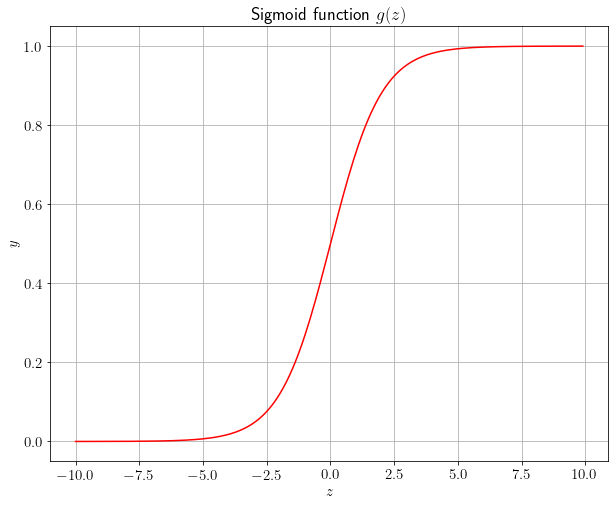

In [14]:
z = np.arange(-10, 10, 0.1)
y = 1 / (1 + np.exp(-z))

plt.figure(figsize=(10, 8))
plt.plot(z, y, color='red');
plt.xlabel('$z$')
plt.ylabel('$y$')
plt.title('Sigmoid function $g(z)$');
plt.grid()
plt.show()

That's the way how we can handle the binary classification. Then how can we apply it multinomial classification that have more than two labels to classify?

## Multinomial Classification
Actually, Multinomial classification is the extended version of binary classification. Suppose we have three labels, $A, B, C$, And we don't know the trick of multinomial classification. how can we classfity them?

The simplest method is divide and conquer. We can divide the big problem into three small problem like,

- Whether it is $A$ or not.
- Whether it is $B$ or not.
- Whether it is $C$ or not.

The hypothesis of binary classification is to predict the probability. So we can combine the three hypothesis of binary classification.

$$ \begin{aligned} H_{\theta}(X) = WX &= \begin{bmatrix} w_{11} & w_{12} & w_{13} \\ w_{21} & w_{22} & w_{23} \\ w_{31} & w_{32} & w_{33} \end{bmatrix} \cdot \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix} \\ &= \begin{bmatrix} w_{11} x_1 + w_{12} x_2 + w_{13} x_3 \\ w_{21} x_1 + w_{22} x_2 + w_{23} x_3 \\ w_{31} x_1 + w_{32} x_2 + w_{33} x_3 \end{bmatrix} = \begin{bmatrix} \bar{y_{A}} \\ \bar{y_{B}} \\ \bar{y_{C}} \end{bmatrix} \end{aligned} $$

It's (3,1) matrix. And the shape of output applying sigmoid function will also (3,1) matrix. What does it mean of each row? If we apply the sigmoid function on each row, It'll be the probability of whether it is True or False. So the first element is the probability of whether it is $A$ or not, and so on. All we have to do is applying sigmoid function on each row, right?

## Softmax function

It will work, eventually. But there is more effective way to calculate the probability. If we apply the sigmoid on each value, let's say the probability of $A$ is 0.55, and $B$ is 0.66%, and $C$ is 0.44. How can we classify it. It has high probability of $B$, but we cannot ignore the probability of $A$ and $C$. So this kind of result is hard to interpret what label it is.

There is the way to calculate the probability of all, that sums up to 1. He we introduce the new additional function the **softmax function**.

$$ \sigma(y_i) = \frac{e^{y_i}}{\sum_{j=1}^{K} e^{y_j}}  $$

The rule of softmax function is to convert the score (the output of matrix multiplication) to probability. And Sum of all probability is 1. All we need to do is find the maximum probability of each row, define its labels. Usually, it can be calculated with argmax function, that is to find the argument to make maximum of its value.

## Cost function of Multinomial classification

We can bring the cost function of binary classification here, the cross-entropy.

$$ \text{C.E.} = -y\log(p) - (1-y)\log(1-p) $$.

In multinomial classification, we can modify the cross entropy function.

$$ \text{C.E.} = -\sum_{i} y_i \log (\bar{y_i}) $$

 The rule of cost function is measure the score of classification. So if the model incorrectly classify the label, cost function must return the low cost, and cost function must give the high cost if it is correctly classified. Even if it is in the case of multinomial classification, it can apply it with same manner. 
 
 As a result, we define the cost function. And we can apply gradient descent to find weight vector to make the cost minimum.

## Implment with Tensorflow

We will try to implment softmax regression with simple dataset. First, define the dataset.

In [15]:
x_data = np.array(
    [[1, 2, 1, 1],
     [2, 1, 3, 2],
     [3, 1, 3, 4],
     [4, 1, 5, 5],
     [1, 7, 5, 5],
     [1, 2, 5, 6],
     [1, 6, 6, 6],
     [1, 7, 7, 7]], dtype=np.float32)

y_data = np.array(
    [[0, 0, 1],
     [0, 0, 1],
     [0, 0, 1],
     [0, 1, 0],
     [0, 1, 0],
     [0, 1, 0],
     [1, 0, 0],
     [1, 0, 0]], dtype=np.float32
)

We have three classes, but for the simplicity, `y_data` is modified with one-hot encoding.
And we need to initialize Weight vector $W$ and bias $b$. Usually, it initializes with random value from normal distribution.

In [16]:
W = tf.Variable(tf.random.normal((x_data.shape[1], y_data.shape[1])), name='weight')
b = tf.Variable(tf.random.normal((y_data.shape[1], )), name='bias')

print(W, b)

<tf.Variable 'weight:0' shape=(4, 3) dtype=float32, numpy=
array([[-0.03031273, -1.060833  , -1.20091   ],
       [-0.5629968 , -0.50404245,  1.4590237 ],
       [-1.2940224 , -0.48054248, -0.13930833],
       [-0.31837052, -0.72089845, -1.0884795 ]], dtype=float32)> <tf.Variable 'bias:0' shape=(3,) dtype=float32, numpy=array([ 0.25864193,  1.4588804 , -1.203377  ], dtype=float32)>


Then, we can define the softmax function with tensorflow. Of course, you can implement it manually with numpy, but tensorflow also offers softmax fuction as an API.
```python
h = tf.nn.softmax(tf.matmul(X, W) + b)
```

In [17]:
def softmax(X):
    return tf.nn.softmax(tf.matmul(X, W) + b)

Test it with sample data,

In [18]:
print(softmax([x_data[0]]))
print(softmax([x_data[0]]).numpy().sum())

tf.Tensor([[0.11066143 0.22252838 0.66681015]], shape=(1, 3), dtype=float32)
1.0


We can also define the cost function and gradient function.

In [19]:
# Cost function
def loss_fn(X, Y):
    logits = softmax(X)
    cost = -tf.reduce_sum(Y * tf.math.log(logits), axis=1)
    cost_mean = tf.reduce_mean(cost)
    return cost_mean

def gradient(X, Y):
    with tf.GradientTape() as tape:
        loss = loss_fn(X, Y)
    grads = tape.gradient(loss, [W, b])
    return grads

Finally, we implement the training step.

In [20]:
# Optimizer (Stochastic Gradient Descent)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

for e in range(5000):
    grads = gradient(x_data, y_data)
    optimizer.apply_gradients(grads_and_vars=zip(grads, [W, b]))
    if e % 500 == 0:
        print('Epoch: {}, Loss: {:.4f}'.format(e, loss_fn(x_data, y_data).numpy()))

Epoch: 0, Loss: 5.2738
Epoch: 500, Loss: 0.7892
Epoch: 1000, Loss: 0.6457
Epoch: 1500, Loss: 0.5712
Epoch: 2000, Loss: 0.5234
Epoch: 2500, Loss: 0.4884
Epoch: 3000, Loss: 0.4606
Epoch: 3500, Loss: 0.4373
Epoch: 4000, Loss: 0.4171
Epoch: 4500, Loss: 0.3993


To check the model performance, we need to check validity.

In [21]:
b = softmax(x_data)
print(tf.argmax(b, 1))
print(tf.argmax(y_data, 1))

tf.Tensor([2 2 2 1 0 1 0 0], shape=(8,), dtype=int64)
tf.Tensor([2 2 2 1 1 1 0 0], shape=(8,), dtype=int64)


Compare the predicted result with actual data, we can find that one data is mis-classified, but most of data are correctly classified.


## Softmax Regression for animal classification

In this section, we apply softmax regressino animal classification. The dataset is from [UCI ML Repository](https://archive.ics.uci.edu/ml/datasets/Zoo).

In [92]:
import pandas as pd

df = pd.read_csv('./dataset/zoo.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


But in our case, we don't need the name of each animals. We want to classify animal's type, regardless of name. 

In [93]:
df = df.drop(0, axis=1)
df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


And when we look at the label of data (the 17th column), we can find that the range is from 1 to 7. we need to shift it by 1.

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       101 non-null    int64
 1   2       101 non-null    int64
 2   3       101 non-null    int64
 3   4       101 non-null    int64
 4   5       101 non-null    int64
 5   6       101 non-null    int64
 6   7       101 non-null    int64
 7   8       101 non-null    int64
 8   9       101 non-null    int64
 9   10      101 non-null    int64
 10  11      101 non-null    int64
 11  12      101 non-null    int64
 12  13      101 non-null    int64
 13  14      101 non-null    int64
 14  15      101 non-null    int64
 15  16      101 non-null    int64
 16  17      101 non-null    int64
dtypes: int64(17)
memory usage: 13.5 KB


In [95]:
df.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [96]:
df[17] = df[17] - 1
df.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,1.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,6.000000


And as you can see from the contents, we need to convert the numeric data with one-hot encoding. Tensorflow offers some APIs for one-hot encoding.


In [97]:
# Separate dataset and labels
X = df.iloc[:, :-1].to_numpy(dtype=np.float32)
y = df.iloc[:, [-1]].to_numpy()

# Make y data with onehot encoding
Y_one_hot = tf.one_hot(list(y), depth=7)
Y_one_hot = tf.reshape(Y_one_hot, [-1, 7])
print(Y_one_hot[:3].numpy())
print(y[:3])

[[1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]]
[[0]
 [0]
 [3]]


> Note: When we try to use tf.one_hot, keep in mind that, If the input indices is rank $N$, the output will have rank $N+1$. The new axis is created at dimension axis. (default case: the new axis is appended at the end) ([link]( https://www.tensorflow.org/api_docs/python/tf/one_hot )). So you must reshape it to maintain the shape of matrix.

All tasks we have done is a part of data preprocessing. So now it is the time to building dataset, and implement the learning process.


In [98]:
# Weight and bias initialization
W = tf.Variable(tf.random.normal([X.shape[1], 7]), name='weight')
b = tf.Variable(tf.random.normal([7, ]), name='bias')
variables = [W, b]

Previously, we built the softmax function and cost function(cross entropy) manually, But the Tensorflow also made a fancy API to do it once. As we define the logit function ($H_{\theta}(X)$) and labels, we can use it for tensorflow API.

In [99]:
# Logit function
def logit_fn(X):
    return tf.matmul(X, W) + b

# Softmax function 
def softmax(X):
    return tf.nn.softmax(logit_fn(X))

# Loss function for cross entropy
def loss_fn(X, y):
    logits = logit_fn(X)
    cost_i = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y)
    return tf.reduce_mean(cost_i)

# Calculate gradient
def grad_fn(X, y):
    with tf.GradientTape() as tape:
        loss = loss_fn(X, y)
    grads = tape.gradient(loss, variables)
    return grads

# Predict function for validation
def prediction(X, y):
    pred = tf.argmax(softmax(X), 1)
    correct = tf.equal(pred, tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    return accuracy

In [100]:
# You can use another optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)

for e in range(2000):
    grads = grad_fn(X, Y_one_hot)
    optimizer.apply_gradients(grads_and_vars=zip(grads, variables))
    
    if e % 100 == 0:
        print('Epoch: {}, Loss: {:.4f}, Acc: {:.4f}'.format(e, 
                                                            loss_fn(X, Y_one_hot).numpy(), 
                                                            prediction(X, Y_one_hot).numpy()))

Epoch: 0, Loss: 6.8638, Acc: 0.0990
Epoch: 100, Loss: 0.7650, Acc: 0.8218
Epoch: 200, Loss: 0.5063, Acc: 0.8713
Epoch: 300, Loss: 0.3788, Acc: 0.9109
Epoch: 400, Loss: 0.2988, Acc: 0.9208
Epoch: 500, Loss: 0.2443, Acc: 0.9406
Epoch: 600, Loss: 0.2055, Acc: 0.9505
Epoch: 700, Loss: 0.1766, Acc: 0.9505
Epoch: 800, Loss: 0.1543, Acc: 0.9505
Epoch: 900, Loss: 0.1366, Acc: 0.9604
Epoch: 1000, Loss: 0.1224, Acc: 0.9802
Epoch: 1100, Loss: 0.1107, Acc: 0.9901
Epoch: 1200, Loss: 0.1009, Acc: 1.0000
Epoch: 1300, Loss: 0.0927, Acc: 1.0000
Epoch: 1400, Loss: 0.0857, Acc: 1.0000
Epoch: 1500, Loss: 0.0797, Acc: 1.0000
Epoch: 1600, Loss: 0.0745, Acc: 1.0000
Epoch: 1700, Loss: 0.0699, Acc: 1.0000
Epoch: 1800, Loss: 0.0659, Acc: 1.0000
Epoch: 1900, Loss: 0.0623, Acc: 1.0000


## Summary
In this post, we covered the softmax function for multinomial classification. Actually, Multinomial classification is extended version of binary classification, so we can apply almost same approach of logistic regression here. But, to easily interpret the result, we substitute sigmoid function to softmax, and get the probability of each labels. We can also implement it with tensorflow 2.x.